# Similarity Based Learning

by: Blaise Geronimo

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import re
from itertools import combinations
from collections import defaultdict, Counter
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.spatial.distance import squareform, pdist
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud

In [2]:
random.seed(16)
random_seed = 16

# Data Import and Exploration

In [3]:
df = pd.read_csv('data/listings.csv')

In [4]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,231497,https://www.airbnb.com/rooms/231497,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★4.73 · 1 bedr...,"This is a big studio at the end of Copacabana,...",NaN,https://a0.muscache.com/pictures/3582382/ee8ac...,1207700,...,4.92,4.90,4.65,NaN,f,4,4,0,0,0.54
1,231516,https://www.airbnb.com/rooms/231516,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★4.71 · 1 bedr...,"Special location of the building, on Copacaban...",NaN,https://a0.muscache.com/pictures/3671683/d74b4...,1207700,...,4.86,4.93,4.38,NaN,f,4,4,0,0,0.20
2,236991,https://www.airbnb.com/rooms/236991,20230922043705,2023-09-23,city scrape,Rental unit in Rio de Janeiro · ★4.89 · 1 bedr...,"Aconchegante, amplo, básico, arejado, iluminad...","Copacabana, apelidada a princesinha do mar, fa...",https://a0.muscache.com/pictures/5725a59b-147d...,1241662,...,4.96,4.99,4.89,NaN,f,2,2,0,0,0.65
3,17878,https://www.airbnb.com/rooms/17878,20230922043705,2023-09-23,city scrape,Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...,Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.77,4.67,NaN,f,1,1,0,0,1.87
4,25026,https://www.airbnb.com/rooms/25026,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★4.71 · 1 bedr...,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/a745aa21-b8dd...,102840,...,4.92,4.84,4.59,NaN,f,1,1,0,0,1.68


In [5]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.196400e+04,3.196400e+04,3.196400e+04,31961.000000,31961.000000,0.0,31964.000000,31964.000000,31964.000000,0.0,...,23668.000000,23667.000000,23665.000000,23667.00000,0.0,31964.000000,31964.000000,31964.000000,31964.000000,23824.000000
mean,3.514699e+17,2.023092e+13,1.663077e+08,16.112450,27.273020,NaN,-22.967574,-43.251361,4.041265,NaN,...,4.881593,4.866827,4.861961,4.69660,NaN,8.839319,8.010825,0.707139,0.111719,0.974190
std,3.999653e+17,0.000000e+00,1.684315e+08,89.082309,134.207472,NaN,0.035182,0.100595,2.370380,NaN,...,0.321587,0.346049,0.322802,0.44839,NaN,23.515196,23.328498,1.735520,0.918342,1.127053
min,1.787800e+04,2.023092e+13,1.671000e+03,1.000000,1.000000,NaN,-23.073276,-43.723009,1.000000,NaN,...,1.000000,1.000000,1.000000,1.00000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.184739e+07,2.023092e+13,2.258631e+07,1.000000,1.000000,NaN,-22.984820,-43.310047,2.000000,NaN,...,4.890000,4.870000,4.850000,4.61000,NaN,1.000000,1.000000,0.000000,0.000000,0.170000
50%,5.261496e+07,2.023092e+13,8.693849e+07,2.000000,3.000000,NaN,-22.972860,-43.195670,4.000000,NaN,...,5.000000,5.000000,4.980000,4.81000,NaN,2.000000,1.000000,0.000000,0.000000,0.570000
75%,7.814279e+17,2.023092e+13,3.004090e+08,5.000000,7.000000,NaN,-22.956165,-43.185946,5.000000,NaN,...,5.000000,5.000000,5.000000,5.00000,NaN,4.000000,3.000000,1.000000,0.000000,1.380000
max,9.855551e+17,2.023092e+13,5.379850e+08,1311.000000,1803.000000,NaN,-22.749690,-43.104400,16.000000,NaN,...,5.000000,5.000000,5.000000,5.00000,NaN,163.000000,159.000000,18.000000,15.000000,14.780000


In [6]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               8140
Length: 75, dtype: int64

# Data Exploration

[Reference](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31964 entries, 0 to 31963
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31964 non-null  int64  
 1   listing_url                                   31964 non-null  object 
 2   scrape_id                                     31964 non-null  int64  
 3   last_scraped                                  31964 non-null  object 
 4   source                                        31964 non-null  object 
 5   name                                          31964 non-null  object 
 6   description                                   31305 non-null  object 
 7   neighborhood_overview                         16739 non-null  object 
 8   picture_url                                   31964 non-null  object 
 9   host_id                                       31964 non-null 

### Data Dictionary

| #  | Column Name                                      | Data Type  | Description |
|----|-------------------------------------------------|-----------|-------------|
| 1  | id                                             | integer   | Airbnb's unique identifier for the listing |
| 2  | listing_url                                    | text      | URL to the Airbnb listing |
| 3  | scrape_id                                      | bigint    | Inside Airbnb "Scrape" this was part of |
| 4  | last_scraped                                   | datetime  | UTC. The date and time this listing was "scraped" |
| 5  | source                                         | text      | Source of the listing data |
| 6  | name                                           | text      | Name of the listing |
| 7  | description                                    | text      | Detailed description of the listing |
| 8  | neighborhood_overview                          | text      | Host's description of the neighborhood |
| 9  | picture_url                                    | text      | URL to the Airbnb hosted regular-sized image for the listing |
| 10 | host_id                                        | integer   | Airbnb's unique identifier for the host/user |
| 11 | host_url                                       | text      | The Airbnb page for the host |
| 12 | host_name                                      | text      | Name of the host. Usually just the first name(s) |
| 13 | host_since                                     | date      | The date the host/user was created |
| 14 | host_location                                  | text      | The host's self-reported location |
| 15 | host_about                                     | text      | Description about the host |
| 16 | host_response_time                             | text      | Host's average response time |
| 17 | host_response_rate                             | text      | Percentage of messages the host responds to |
| 18 | host_acceptance_rate                           | text      | The rate at which a host accepts booking requests |
| 19 | host_is_superhost                              | boolean   | Whether the host is a superhost (t=true; f=false) |
| 20 | host_thumbnail_url                             | text      | URL to the host's thumbnail image |
| 21 | host_picture_url                               | text      | URL to the host's profile picture |
| 22 | host_neighbourhood                            | text      | The neighborhood where the host is located |
| 23 | host_listings_count                            | integer   | The number of listings the host has |
| 24 | host_total_listings_count                      | integer   | The total number of listings the host has |
| 25 | host_verifications                             | text      | Verification methods the host has completed |
| 26 | host_has_profile_pic                           | boolean   | Whether the host has a profile picture (t=true; f=false) |
| 27 | host_identity_verified                         | boolean   | Whether the host's identity is verified (t=true; f=false) |
| 28 | neighbourhood                                  | text      | The neighborhood where the listing is located |
| 29 | neighbourhood_cleansed                         | text      | The neighborhood as geocoded using latitude and longitude |
| 30 | neighbourhood_group_cleansed                   | text      | The neighborhood group as geocoded using latitude and longitude |
| 31 | latitude                                       | numeric   | Uses the World Geodetic System (WGS84) projection for latitude |
| 32 | longitude                                      | numeric   | Uses the World Geodetic System (WGS84) projection for longitude |
| 33 | property_type                                  | text      | Self-selected property type |
| 34 | room_type                                      | text      | The type of room offered (Entire home/apt, Private room, Shared room) |
| 35 | accommodates                                   | integer   | The maximum capacity of the listing |
| 36 | bathrooms                                      | numeric   | The number of bathrooms in the listing |
| 37 | bathrooms_text                                 | text      | Text description of the number of bathrooms |
| 38 | bedrooms                                       | integer   | The number of bedrooms |
| 39 | beds                                           | integer   | The number of beds |
| 40 | amenities                                      | json      | List of amenities provided |
| 41 | price                                          | currency  | Daily price in local currency |
| 42 | minimum_nights                                 | integer   | Minimum number of nights required for a booking |
| 43 | maximum_nights                                 | integer   | Maximum number of nights allowed for a booking |
| 44 | minimum_minimum_nights                         | integer   | The smallest minimum_night value from the calendar |
| 45 | maximum_minimum_nights                         | integer   | The largest minimum_night value from the calendar |
| 46 | minimum_maximum_nights                         | integer   | The smallest maximum_night value from the calendar |
| 47 | maximum_maximum_nights                         | integer   | The largest maximum_night value from the calendar |
| 48 | minimum_nights_avg_ntm                         | numeric   | The average minimum_night value from the calendar |
| 49 | maximum_nights_avg_ntm                         | numeric   | The average maximum_night value from the calendar |
| 50 | calendar_updated                               | date      | The last time the calendar was updated |
| 51 | has_availability                              | boolean   | Whether the listing has availability (t=true; f=false) |
| 52 | availability_30                                | integer   | The availability of the listing in the next 30 days |
| 53 | availability_60                                | integer   | The availability of the listing in the next 60 days |
| 54 | availability_90                                | integer   | The availability of the listing in the next 90 days |
| 55 | availability_365                               | integer   | The availability of the listing in the next 365 days |
| 56 | calendar_last_scraped                          | date      | The last date the listing's calendar was scraped |
| 57 | number_of_reviews                             | integer   | The total number of reviews for the listing |
| 58 | number_of_reviews_ltm                         | integer   | The number of reviews in the last 12 months |
| 59 | number_of_reviews_l30d                        | integer   | The number of reviews in the last 30 days |
| 60 | first_review                                  | date      | The date of the first review received |
| 61 | last_review                                   | date      | The date of the most recent review |
| 62 | review_scores_rating                          | numeric   | The average rating score given to the listing |
| 63 | review_scores_accuracy                        | numeric   | Accuracy rating of the listing |
| 64 | review_scores_cleanliness                     | numeric   | Cleanliness rating of the listing |
| 65 | review_scores_checkin                         | numeric   | Check-in experience rating |
| 66 | review_scores_communication                   | numeric   | Communication rating of the host |
| 67 | review_scores_location                        | numeric   | Location rating of the listing |
| 68 | review_scores_value                           | numeric   | Value-for-money rating of the listing |
| 69 | license                                       | text      | The license/permit/registration number of the listing |
| 70 | instant_bookable                              | boolean   | Whether guests can book instantly (t=true; f=false) |
| 71 | calculated_host_listings_count                | integer   | The number of listings the host has in the current scrape |
| 72 | calculated_host_listings_count_entire_homes   | integer   | The number of entire home/apt listings the host has in the current scrape |
| 73 | calculated_host_listings_count_private_rooms  | integer   | The number of private room listings the host has in the current scrape |
| 74 | calculated_host_listings_count_shared_rooms   | integer   | The number of shared room listings the host has in the current scrape |
| 75 | reviews_per_month                             | numeric   | The number of reviews per month the listing receives |



## Dataset Type

In [8]:
# Identify numeric columns (int, float)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object, boolean)
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Identify columns that might be mixed or need further analysis
mixed_cols = [col for col in df.columns if col not in numerical_cols + categorical_cols]

In [9]:
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


In [10]:
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'instant_bookable']


In [11]:
print("Potential Mixed Columns:", mixed_cols)

Potential Mixed Columns: []


The data is a mixed-type dataset with numeric, categorical, and text columns. The dataset includes structured data for Airbnb listigs, such as host information, property descriptionsw, neighborhood data, and availability. The absence of mixed-type columns means that the dataset is well-organized and ready for further analysis.

## Data Quality Assessment

In [12]:
df_cleaned = df.copy()

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31964 entries, 0 to 31963
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31964 non-null  int64  
 1   listing_url                                   31964 non-null  object 
 2   scrape_id                                     31964 non-null  int64  
 3   last_scraped                                  31964 non-null  object 
 4   source                                        31964 non-null  object 
 5   name                                          31964 non-null  object 
 6   description                                   31305 non-null  object 
 7   neighborhood_overview                         16739 non-null  object 
 8   picture_url                                   31964 non-null  object 
 9   host_id                                       31964 non-null 

## Drop Unecessary Columns

In [14]:
df_cleaned.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview',
                         'picture_url', 'host_url', 'host_name','host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                         'bathrooms', 'neighbourhood','calendar_updated', 'calendar_last_scraped', 'license',
                         'neighbourhood_group_cleansed'], axis=1, inplace=True)

**Reason for dropping:**

| Column Name                    | Reason for Dropping                                                                            |
|--------------------------------|------------------------------------------------------------------------------------------------|
| `listing_url`                 | Not relevant for analysis; only useful for direct access to listings.                          |
| `scrape_id`                   | Identifier related to the scraping process, not useful for analysis.                           |
| `last_scraped`                | Date when data was scraped, not informative for predictive analysis.                           |
| `source`                      | Indicates the data source but does not contribute to the analysis.                             |
| `name`                        | Listing name is descriptive but not useful for modeling.                                       |
| `description`                 | Contains unstructured text, requiring NLP processing, but not needed for the current analysis. |
| `neighborhood_overview`       | Unstructured text field; redundant with structured neighborhood attributes.                    |
| `picture_url`                 | Only provides an image link, irrelevant for numerical or categorical analysis.                 |
| `host_url`                    | Provides a direct link to the host's page, unnecessary for analysis.                           |
| `host_name`                   | Personal identification information, does not impact listing attributes.                       |
| `host_location`               | Self-reported by the host, often inconsistent and redundant with geolocation data.             |
| `host_about`                  | Unstructured text that does not contribute directly to numerical analysis.                     |
| `host_thumbnail_url`          | Image link of the host, irrelevant for analysis.                                               |
| `host_picture_url`            | Another host image link, unnecessary for numerical analysis.                                   |
| `bathrooms`                   | Contains mostly missing values, replaced with `bathrooms_text`.                                |
| `neighbourhood`               | Largely redundant due to `neighbourhood_cleansed`, which is cleaner and more structured.       |
| `calendar_updated`            | All values are missing, offering no useful data.                                               |
| `calendar_last_scraped`       | Similar to `last_scraped`, irrelevant for any prediction or analysis.                          |
| `license`                     | Contains all null values, not useful for analysis.                                             |
| `neighbourhood_group_cleansed` | Contains all null values, making it irrelevant for analysis.                                   |

## Handle Missing Values

In [15]:
df_cleaned.isnull().sum()

id                                                 0
host_id                                            0
host_since                                         3
host_response_time                              6708
host_response_rate                              6708
host_acceptance_rate                            4781
host_is_superhost                                656
host_neighbourhood                              8062
host_listings_count                                3
host_total_listings_count                          3
host_verifications                                 3
host_has_profile_pic                               3
host_identity_verified                             3
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                  

### Values Missing Complety at Random

these will be values we cannot impute or not have enough data/information to impute

In [16]:
df_cleaned.dropna(subset=['first_review', 'last_review', 'reviews_per_month'], inplace=True)
# a null value on these columns means that these listings have no reviews and highly likely unavailed

In [17]:
df_cleaned.dropna(subset=['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                          'review_scores_location', 'review_scores_value'], inplace=True)
# review scores are highly subjective and cannot be reliably predicted

In [18]:
df_cleaned.dropna(subset=['host_verifications'], inplace=True) # we cannot predict/impute host verifications

### Numerical Data

In [19]:
# convert to numerical
df_cleaned['host_acceptance_rate'] = df_cleaned['host_acceptance_rate'].str.rstrip('%').astype(float) / 100
df_cleaned['host_response_rate'] = df_cleaned['host_response_rate'].str.rstrip('%').astype(float) / 100

In [20]:
# impute using median to preserve skew
numerical_cols = ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds']
for col in numerical_cols:
    df_cleaned.loc[:, col] = df_cleaned[col].fillna(df_cleaned[col].median())

### Categorical Data

In [21]:
# check correlation between host_response_rate and host_response_time
df_temp = df_cleaned[['host_response_rate', 'host_response_time']].dropna()

# temporarily encode categorical values
response_time_order = {
    "within an hour": 1,
    "within a few hours": 2,
    "within a day": 3,
    "a few days or more": 4
}

df_temp['host_response_time_numeric'] = df_temp['host_response_time'].map(response_time_order)
correlation = df_temp[['host_response_rate', 'host_response_time_numeric']].corr().iloc[0, 1] # get correlation
print(correlation)

-0.7504701566106562


The correlation value of -0.75 suggests a strong negative correlation between host_response_rate and host_response_time. This means that as host response rate increases, response time tends to decrease (faster responses). We can impute this using a machine learning predictions. In this case, we will use [sklearn's randomforest](https://www.geeksforgeeks.org/handling-missing-values-with-random-forest/)

In [22]:
label_encoder = LabelEncoder()
df_cleaned['host_response_time_encoded'] = label_encoder.fit_transform(df_cleaned['host_response_time'].astype(str))  # encode response time

# separate null and non-null
train_data = df_cleaned[df_cleaned['host_response_time'].notna()]
null_data = df_cleaned[df_cleaned['host_response_time'].isna()]

# define features (X) and target (y)
X_train = train_data[['host_response_rate']]
y_train = train_data['host_response_time_encoded']
X_test = null_data[['host_response_rate']]

In [23]:
clf = RandomForestClassifier(n_estimators=100, random_state=random_seed)  # RF model
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred = clf.predict(X_test)  # predict missing values

df_cleaned.loc[df_cleaned['host_response_time'].isna(), 'host_response_time_encoded'] = y_pred  # reassign predicted to df

df_cleaned['host_response_time'] = label_encoder.inverse_transform(df_cleaned['host_response_time_encoded'])  # revert to original, to be transformed later

In [25]:
df_cleaned.drop(columns=['host_response_time_encoded'], inplace=True)  # drop temporary encoded column

In [26]:
df_cleaned.loc[:, 'host_is_superhost'] = df_cleaned['host_is_superhost'].fillna('f')  # assume host is not superhost
df_cleaned.loc[:, 'host_neighbourhood'] = df_cleaned['host_neighbourhood'].fillna('unknown')  # since we cant assume host location

In [27]:
print(df_cleaned['bathrooms_text'].unique())

['1 bath' nan '2 baths' '1.5 baths' '7 baths' '3 baths' '4 baths'
 '2.5 baths' '1 shared bath' '1 private bath' '5 shared baths'
 '2 shared baths' '0 shared baths' '4.5 baths' '0 baths'
 '1.5 shared baths' '5 baths' '2.5 shared baths' 'Shared half-bath'
 '10 baths' '3.5 baths' '6 baths' '6.5 baths' '3 shared baths'
 '3.5 shared baths' '5.5 baths' '7.5 baths' '8 baths' '4 shared baths'
 '15 baths' '8.5 baths' '20 shared baths' '4.5 shared baths'
 '6.5 shared baths' '15.5 baths' 'Half-bath' '6 shared baths'
 '7 shared baths' '9 baths' '11 baths' '16 baths' '11.5 baths'
 '10.5 baths' '8 shared baths' 'Private half-bath']


The `bathrooms_text` column contains text-based values describing the number and type of bathrooms. This includes:
* Numeric values ("1 bath", "2.5 baths", "10 baths")
* Shared/private distinctions ("1 shared bath", "3.5 shared baths", "Private half-bath")
* Half-baths ("Shared half-bath", "Half-bath")
* Missing values (nan)

Since this is an unstructured categorical feature, it cannot be directly used in analysis or modeling. We can instead, convert `bathrooms_text` into numeric features:
* `bathrooms_private` = The number of private bathrooms.
* `bathrooms_shared` = The number of shared bathrooms

In [28]:
def categorize_bathrooms(value):
    if pd.isna(value):
        return np.nan, np.nan  # keep nan as nan

    value = value.lower()

    # extract numeric part
    num_baths = float(value.split(' ')[0]) if value.split(' ')[0].replace('.', '').isdigit() else 0

    # classify as shared or private
    if 'shared' in value:
        return 0, num_baths  # all shared
    elif 'private' in value:
        return num_baths, 0  # all private
    elif 'half' in value:
        return 0.5, 0  # private half-bath
    else:
        return num_baths, 0  # default to private in case unspecified

In [29]:
# storage for new values
bathrooms_private_list = []
bathrooms_shared_list = []

for value in df_cleaned['bathrooms_text']:  # iterate over the column and apply function
    private, shared = categorize_bathrooms(value)
    bathrooms_private_list.append(private)
    bathrooms_shared_list.append(shared)

# put arrays to dataframe column
df_cleaned['bathrooms_private'] = bathrooms_private_list
df_cleaned['bathrooms_shared'] = bathrooms_shared_list

In [30]:
df_cleaned.drop(columns=['bathrooms_text'], inplace=True)  # drop original

In [31]:
# mode imputation
df_cleaned.loc[:, 'bathrooms_private'] = df_cleaned['bathrooms_private'].fillna(df_cleaned['bathrooms_private'].mode()[0])
df_cleaned.loc[:, 'bathrooms_shared'] = df_cleaned['bathrooms_shared'].fillna(df_cleaned['bathrooms_shared'].mode()[0])

In [32]:
df_cleaned[['bathrooms_private', 'bathrooms_shared']].head()

,bathrooms_private,bathrooms_shared
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [33]:
df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0]  # check for any missing values left

Series([], dtype: int64)

## Handle Date Attributes
Since time series analysis will not be performed, the date columns will be transformed into numerical values. Specifically, they will be converted to "days since" a reference date, which is the date when the data was scraped (collected). This approach standardizes the time-related information for easier analysis.

In [34]:
# get the most recent scrape day
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'], errors='coerce')
reference_date = df['calendar_last_scraped'].max()

In [35]:
date_cols = ['host_since', 'first_review', 'last_review']  # identified date columns

# convert date columns to datetime then compute days since reference date and rename columns
for col in date_cols:
    df_cleaned[f'days_since_{col}'] = abs((pd.to_datetime(df_cleaned[col], errors='coerce') - reference_date).dt.days)

In [36]:
df_cleaned[['days_since_host_since', 'days_since_first_review', 'days_since_last_review']].head()

,days_since_host_since,days_since_first_review,days_since_last_review
0,4381,4328,12
1,4381,4343,2589
2,4373,3491,18
3,5006,4818,12
4,4921,4856,16


In [37]:
df_cleaned.drop(columns=date_cols, inplace=True)  # drop original date columns

## Convert Attributes

In [38]:
# price
df_cleaned['price'] = df_cleaned['price'].str.replace('[$,]', '', regex=True).astype(float)
df_cleaned[['price']].head()

,price
0,180.0
1,350.0
2,190.0
3,279.0
4,330.0


## Feature Generation

### Combine `host_neighbourhood` and `neighbourhood_cleansed`
This will be done because both columns have too high cardinality. The location of the listing can be referenced through its longitude/latitude which will also be transformed later on.

In [39]:
df_cleaned['if_host_in_neighbourhood'] = df_cleaned['host_neighbourhood'] == df_cleaned['neighbourhood_cleansed']
df_cleaned[['if_host_in_neighbourhood']].head()

,if_host_in_neighbourhood
0,True
1,True
2,True
3,True
4,True


In [40]:
df_cleaned.drop(columns=['host_neighbourhood', 'neighbourhood_cleansed'], inplace=True)  # drop original columns

### Generalize Property Types
`property_type` is another column with high cardinality. We should attempt to generalize them into common categories. To accomplish this, we extract common bigrams in the column to see common occuring words.

In [41]:
property_texts = df_cleaned['property_type'].dropna().str.lower()  # standardize the case of property type

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')  # use NLTK CountVectorizer to extract bigrams
X = vectorizer.fit_transform(property_texts)

In [42]:
# get bigram counts
bigram_counts = np.array(X.sum(axis=0)).flatten()
bigram_features = vectorizer.get_feature_names_out()

# convert to dataframe for easier visualization
bigram_df = pd.DataFrame({'bigram': bigram_features, 'count': bigram_counts}).sort_values(by='count', ascending=False)
bigram_df.head()

,bigram,count
25,rental unit,17367
16,entire rental,14614
24,private room,4271
45,room rental,2753
9,entire condo,1607


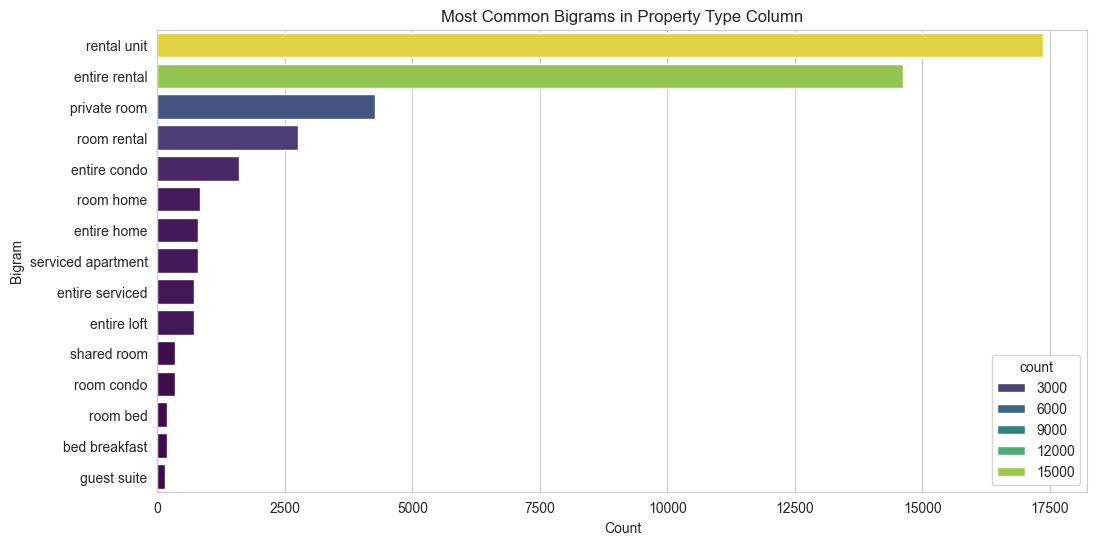

In [43]:
# visualize bigram frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_df['count'].head(15), y=bigram_df['bigram'].head(15), hue= bigram_df['count'].head(15),
            palette="viridis")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.title("Most Common Bigrams in Property Type Column")
plt.show()

Based on the common bigrams above, we can logically group the property_type values into four categories:

**Proposed Categories:**
* **Entire rental**: Includes "entire rental", "entire condo", "entire home", "entire loft", "entire serviced apartment"
* **Private room**: Includes "private room", "room rental", "room home", "room condo"
* **Shared room**: Includes "shared room"
* **Other**: Includes less frequent property types such as "bed breakfast", "room hotel", etc.

In [44]:
def categorize_property(prop):
    prop = str(prop).lower()
    # entire rental
    if "entire rental" in prop or "entire condo" in prop or "entire home" in prop or "entire loft" in prop or "entire serviced" in prop:
        return "entire_rental"

    # private room
    elif "private room" in prop or "room rental" in prop or "room home" in prop or "room condo" in prop:
        return "private_room"

    # shared room
    elif "shared room" in prop:
        return "shared_room"

    # others
    else:
        return "other"

In [45]:
df_cleaned['property_category'] = df_cleaned['property_type'].apply(categorize_property)
df_cleaned[['property_category']].head()

,property_category
0,entire_rental
1,entire_rental
2,entire_rental
3,entire_rental
4,entire_rental


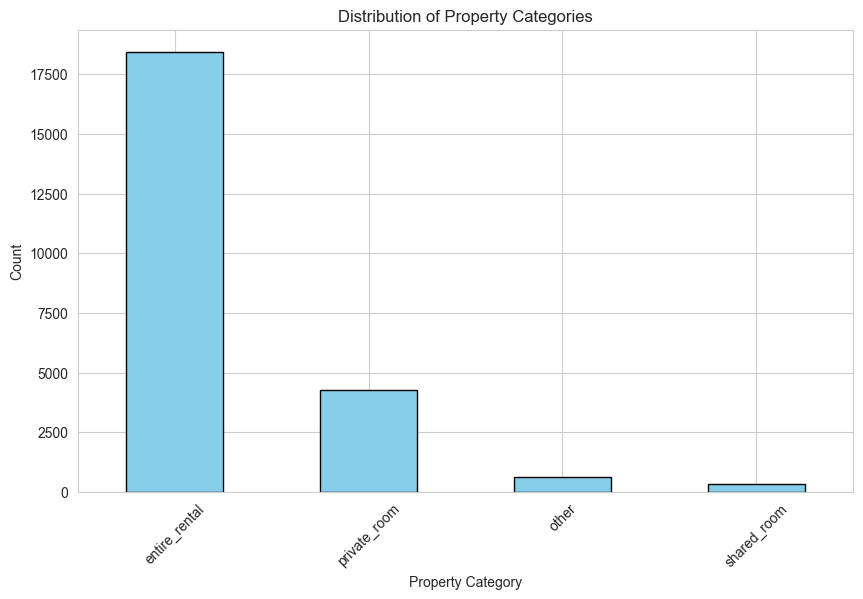

In [46]:
# show bar chart for property_category frequencies
property_category_counts = df_cleaned['property_category'].value_counts()

plt.figure(figsize=(10, 6))
property_category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Property Categories")
plt.xlabel("Property Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [47]:
df_cleaned.drop(columns=['property_type'], inplace=True)  # drop original

### Create `distance_to_major_tourist_location`

Since `latitude` and `longitude` are not directly useful for our analysis, especially given that the focus is localized to the Philippines rather than particular geographic patterns, we will derive a more meaningful attribute which will speak about the listing's distance to a major tourist location.

The major tourist location's reference is [Christ the Redeemer](https://latitude.to/articles-by-country/br/brazil/325/christ-the-redeemer-statue) since the listings are in Brazil and it is [the most famous tourist attraction in Brazil](https://edition.cnn.com/travel/christ-redeemer-rio-de-janeiro-brazil-history/index.html). The distance formula to be used is the [haversine formula](https://www.movable-type.co.uk/scripts/latlong.html) as [suggested in stackoverflow](https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula)

In [48]:
ref_lat, ref_lon = -22.950996196, -43.206499174  # Christ the redeemer coordinates

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in KM
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return round((R * c), 2)  # return d in KM

In [49]:
df_cleaned['distance_to_major_tourist_location'] = list(map(
    # apply haversine distance
    haversine_distance,

    # coordinates for each row
    df_cleaned['latitude'],
    df_cleaned['longitude'],

    # list of reference latitude and longitude
    [ref_lat] * len(df_cleaned),
    [ref_lon] * len(df_cleaned)
))

In [50]:
df_cleaned[['distance_to_major_tourist_location']].head()

,distance_to_major_tourist_location
0,3.79
1,3.54
2,3.60
3,3.24
4,3.33


In [51]:
df_cleaned.drop(columns=['latitude', 'longitude'], inplace=True)  # drop original columns

### Generalize Verification Types

In [52]:
df_cleaned['host_verifications'].unique()

array(["['email', 'phone']", "['email', 'phone', 'work_email']",
       "['phone', 'work_email']", "['phone']", "['email']", '[]',
       "['email', 'phone', 'photographer']"], dtype=object)

In [53]:
# ensure the column is a string and make nans empty
df_cleaned['host_verifications'] = df_cleaned['host_verifications'].astype(str)
df_cleaned['host_verifications'] = df_cleaned['host_verifications'].replace(['None', 'nan', '[]'], '')

In [54]:
df_cleaned['host_verifications'] = df_cleaned['host_verifications'].str.replace(r"[\[\]']", "", regex=True)  # remove brackets and clean entries

In [55]:
def split_verifications(value):
    if value:
        return value.split(", ")
    return []

In [56]:
df_cleaned['host_verifications'] = df_cleaned['host_verifications'].apply(split_verifications)  # split each verification

In [57]:
unique_verifications = set()  # so no duplicates
for verifications in df_cleaned['host_verifications']:  # extract verification types
    unique_verifications.update(verifications)

unique_verifications.discard("")  # in case empties get included

In [58]:
clean_verifications = {verif.strip(): f"host_verif_{verif.strip().replace(' ', '_')}" for verif in unique_verifications}  # initialize column namess

# initialize binary columns with 0s
for clean_name in clean_verifications.values():
    df_cleaned[clean_name] = 0

In [59]:
# assign 1s accordingly to records with corresponding verification type
for index, row in df_cleaned.iterrows():
    for verification in row['host_verifications']:
        verification = verification.strip()  # clean extra spaces
        if verification in clean_verifications:
            df_cleaned.at[index, clean_verifications[verification]] = 1

In [60]:
df_cleaned[['host_verif_work_email', 'host_verif_email', 'host_verif_phone']].head()

,host_verif_work_email,host_verif_email,host_verif_phone
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,1


In [61]:
df_cleaned.drop(columns=['host_verifications',  # drop original
                         'host_verif_photographer'  # only one record has photographer = 1
                         ], inplace=True)

### Create `average_ratings` column

In [62]:
df_cleaned['average_ratings'] = round(df_cleaned[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                            'review_scores_communication', 'review_scores_location', 'review_scores_value']].mean(axis=1), 2)

df_cleaned[['average_ratings']].head()

,average_ratings
0,4.83
1,4.71
2,4.94
3,4.76
4,4.76


## Label Encoding

In [63]:
# columns to label encode
label_encode_cols = [
    'host_response_time', 'host_is_superhost', 'host_has_profile_pic',
    'host_identity_verified', 'room_type', 'has_availability',
    'instant_bookable', 'property_category'
]

# initialize LabelEncoders
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))  # Convert to string if needed
    label_encoders[col] = le  # Store encoders for reference

In [64]:
# one-hot encode the categorical columns
one_hot_cols = [col for col in label_encode_cols if df_cleaned[col].nunique() > 2]  # keep only non-binary cols
df_cleaned = pd.get_dummies(df_cleaned, columns=one_hot_cols, dtype=int)

In [65]:
# identify binary columns
binary_cols = [col for col in label_encode_cols if col in df_cleaned.columns and df_cleaned[col].nunique() == 2]

In [66]:
df_cleaned.drop(columns=binary_cols, inplace=True)  # drop original

In [67]:
label_mappings = {}  # to store label mappings

# retrieve original labels and their encoded values
for col, encoder in label_encoders.items():
    original_labels = encoder.classes_  # original categories before encoding
    encoded_values = encoder.transform(original_labels)  # encoded values
    label_mappings[col] = dict(zip(encoded_values, original_labels))  # store mapping

# for reference
print(label_mappings)

{'host_response_time': {np.int64(0): 'a few days or more', np.int64(1): 'within a day', np.int64(2): 'within a few hours', np.int64(3): 'within an hour'}, 'host_is_superhost': {np.int64(0): 'f', np.int64(1): 't'}, 'host_has_profile_pic': {np.int64(0): 'f', np.int64(1): 't'}, 'host_identity_verified': {np.int64(0): 'f', np.int64(1): 't'}, 'room_type': {np.int64(0): 'Entire home/apt', np.int64(1): 'Hotel room', np.int64(2): 'Private room', np.int64(3): 'Shared room'}, 'has_availability': {np.int64(0): 'f', np.int64(1): 't'}, 'instant_bookable': {np.int64(0): 'f', np.int64(1): 't'}, 'property_category': {np.int64(0): 'entire_rental', np.int64(1): 'other', np.int64(2): 'private_room', np.int64(3): 'shared_room'}}


## Prepare `amenities` attribute for Apriori analysis

In [68]:
def clean_amenities(amenities_str):
    try:
        # extract amenities from string
        amenities_list = re.findall(r'"([^"]+)"', amenities_str)

        # etandardize and clean amenities
        cleaned_amenities = []
        for amenity in amenities_list:
            amenity = amenity.lower().strip()  # convert to lowercase and strip spaces
            amenity = re.sub(r'[^\w\s-]', '', amenity)  # remove special characters except hyphens

            if amenity:  # ensure non-empty entries
                cleaned_amenities.append(amenity)

        # remove duplicates within the same row
        cleaned_amenities = list(set(cleaned_amenities))

        return cleaned_amenities
    except Exception as e:
        return [f"Error: {str(e)}"]  # for debugging

In [69]:
df_cleaned['cleaned_amenities'] = df_cleaned['amenities'].astype(str).apply(clean_amenities)  # apply

In [70]:
def join_amenities(amenities):
    if isinstance(amenities, list):
        return ', '.join(amenities)
    return ''

In [71]:
df_cleaned['cleaned_amenities'] = df_cleaned['cleaned_amenities'].apply(join_amenities)  # comma separated

In [72]:
df_cleaned[['cleaned_amenities']].head()

,cleaned_amenities
0,"coffee maker drip coffee maker, hot water, ess..."
1,"elevator, tv, air conditioning, wifi, kitchen"
2,"hangers, esmaltec gas stove, cooking basics, e..."
3,"smoking allowed, hot water, private entrance, ..."
4,"hot water, dedicated workspace, books and read..."


In [73]:
# make new column, no_of_amenities
df_cleaned['no_of_amenities'] = df_cleaned['cleaned_amenities'].str.split(',').apply(len)
df_cleaned[['no_of_amenities']].head()

,no_of_amenities
0,21
1,5
2,7
3,26
4,32


In [74]:
df_cleaned.drop(columns=['amenities'], inplace=True, axis=1)  # drop original

In [75]:
df_cleaned.head()

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,price,...,room_type_0,room_type_1,room_type_2,room_type_3,property_category_0,property_category_1,property_category_2,property_category_3,cleaned_amenities,no_of_amenities
0,231497,1207700,1.0,0.82,4.0,8.0,4,1.0,1.0,180.0,...,1,0,0,0,1,0,0,0,"coffee maker drip coffee maker, hot water, ess...",21
1,231516,1207700,1.0,0.82,4.0,8.0,4,1.0,1.0,350.0,...,1,0,0,0,1,0,0,0,"elevator, tv, air conditioning, wifi, kitchen",5
2,236991,1241662,1.0,0.96,2.0,2.0,5,1.0,4.0,190.0,...,1,0,0,0,1,0,0,0,"hangers, esmaltec gas stove, cooking basics, e...",7
3,17878,68997,1.0,0.96,2.0,5.0,5,2.0,2.0,279.0,...,1,0,0,0,1,0,0,0,"smoking allowed, hot water, private entrance, ...",26
4,25026,102840,1.0,0.73,1.0,5.0,3,1.0,1.0,330.0,...,1,0,0,0,1,0,0,0,"hot water, dedicated workspace, books and read...",32


In [76]:
df_cleaned.to_csv('cleaned_listings.csv', index=False)

## Standardize Columns

In [77]:
columns_to_standardize = [col for col in df_cleaned.columns if col not in ['cleaned_amenities', 'id', 'host_id']]

scaler = StandardScaler()  # scaler

In [78]:
df_standardized = df_cleaned.copy()

df_standardized[columns_to_standardize] = scaler.fit_transform(df_cleaned[columns_to_standardize])  # apply scaler

In [79]:
df_standardized.drop(columns=['cleaned_amenities']).head()

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,price,...,host_response_time_3,room_type_0,room_type_1,room_type_2,room_type_3,property_category_0,property_category_1,property_category_2,property_category_3,no_of_amenities
0,231497,1207700,0.359127,-0.109928,-0.131599,-0.138987,0.030127,-0.594523,-0.722014,-0.074779,...,-1.447860,0.503233,-0.043648,-0.477305,-0.12181,0.531981,-0.1617,-0.469279,-0.12181,-0.157597
1,231516,1207700,0.359127,-0.109928,-0.131599,-0.138987,0.030127,-0.594523,-0.722014,-0.042027,...,-1.447860,0.503233,-0.043648,-0.477305,-0.12181,0.531981,-0.1617,-0.469279,-0.12181,-1.341578
2,236991,1241662,0.359127,0.488212,-0.153245,-0.182817,0.484816,-0.594523,0.769689,-0.072852,...,0.690675,0.503233,-0.043648,-0.477305,-0.12181,0.531981,-0.1617,-0.469279,-0.12181,-1.193581
3,17878,68997,0.359127,0.488212,-0.153245,-0.160902,0.484816,0.490910,-0.224780,-0.055706,...,0.690675,0.503233,-0.043648,-0.477305,-0.12181,0.531981,-0.1617,-0.469279,-0.12181,0.212397
4,25026,102840,0.359127,-0.494446,-0.164068,-0.160902,-0.424562,-0.594523,-0.722014,-0.045880,...,-1.447860,0.503233,-0.043648,-0.477305,-0.12181,0.531981,-0.1617,-0.469279,-0.12181,0.656390


# 6. Application of Proximity (Distance Analysis) (15 pts)

In [80]:
df_proximity = df_standardized.copy()

In [81]:
df_proximity.dropna(inplace=True)

In [82]:
df_proximity.drop(columns=['cleaned_amenities', 'id', 'host_id'], inplace=True)

In [83]:
df_proximity.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,host_response_time_3,room_type_0,room_type_1,room_type_2,room_type_3,property_category_0,property_category_1,property_category_2,property_category_3,no_of_amenities
0,0.359127,-0.109928,-0.131599,-0.138987,0.030127,-0.594523,-0.722014,-0.074779,-0.043157,-0.879003,...,-1.447860,0.503233,-0.043648,-0.477305,-0.12181,0.531981,-0.1617,-0.469279,-0.12181,-0.157597
1,0.359127,-0.109928,-0.131599,-0.138987,0.030127,-0.594523,-0.722014,-0.042027,-0.043157,-0.879003,...,-1.447860,0.503233,-0.043648,-0.477305,-0.12181,0.531981,-0.1617,-0.469279,-0.12181,-1.341578
2,0.359127,0.488212,-0.153245,-0.182817,0.484816,-0.594523,0.769689,-0.072852,0.060345,-1.036559,...,0.690675,0.503233,-0.043648,-0.477305,-0.12181,0.531981,-0.1617,-0.469279,-0.12181,-1.193581
3,0.359127,0.488212,-0.153245,-0.160902,0.484816,0.490910,-0.224780,-0.055706,0.060345,-1.007149,...,0.690675,0.503233,-0.043648,-0.477305,-0.12181,0.531981,-0.1617,-0.469279,-0.12181,0.212397
4,0.359127,-0.494446,-0.164068,-0.160902,-0.424562,-0.594523,-0.722014,-0.045880,-0.094908,-0.939925,...,-1.447860,0.503233,-0.043648,-0.477305,-0.12181,0.531981,-0.1617,-0.469279,-0.12181,0.656390


## Correlation

In [84]:
correlation_matrix = df_proximity.corr()  # get corr matrix

correlation_pairs = correlation_matrix.where((correlation_matrix > 0.50) 
                                             & (correlation_matrix != 1)).stack().reset_index()  # get significant pairs except diagonals
# to remove the duplicates

In [85]:
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation Coefficient']  # for better reference

correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] < correlation_pairs['Feature 2']]  # remove other duplicate pairs

In [86]:
correlation_pairs = correlation_pairs.sort_values('Correlation Coefficient', ascending=False)  # sort
correlation_pairs

,Feature 1,Feature 2,Correlation Coefficient
106,calculated_host_listings_count,calculated_host_listings_count_entire_homes,0.996199
32,maximum_maximum_nights,maximum_nights_avg_ntm,0.987370
132,property_category_2,room_type_2,0.983185
23,minimum_minimum_nights,minimum_nights_avg_ntm,0.979975
0,host_listings_count,host_total_listings_count,0.968335
...,...,...,...
95,review_scores_location,review_scores_value,0.532304
41,availability_30,availability_365,0.530969
88,review_scores_communication,review_scores_location,0.524969
111,calculated_host_listings_count_private_rooms,property_category_2,0.513466


After studying each pairs correlation, the following pairs are extracted:

`review_scores_checkin` and `review_scores_communication` **(0.75 correlation)**: The check-in process is key to guest experience. Clear communication about check-in details leads to smoother arrivals, directly contributing to higher ratings.

`review_scores_accuracy` and `review_scores_communication` **(0.69 correlation)**: Accurate listings and clear communication are crucial for setting guest expectations. A high correlation between these two suggests that effective communication leads to more accurate descriptions, which improves guest satisfaction.
`

These pairs align with our goal of improving the guest experience and optimizing Airbnb listings for better ratings.

In [87]:
correlation_pairs[
    correlation_pairs['Feature 1'].isin(['review_scores_accuracy', 'review_scores_checkin']) &
    correlation_pairs['Feature 2'].isin(['review_scores_communication'])
]

,Feature 1,Feature 2,Correlation Coefficient
80,review_scores_checkin,review_scores_communication,0.745876
67,review_scores_accuracy,review_scores_communication,0.691867


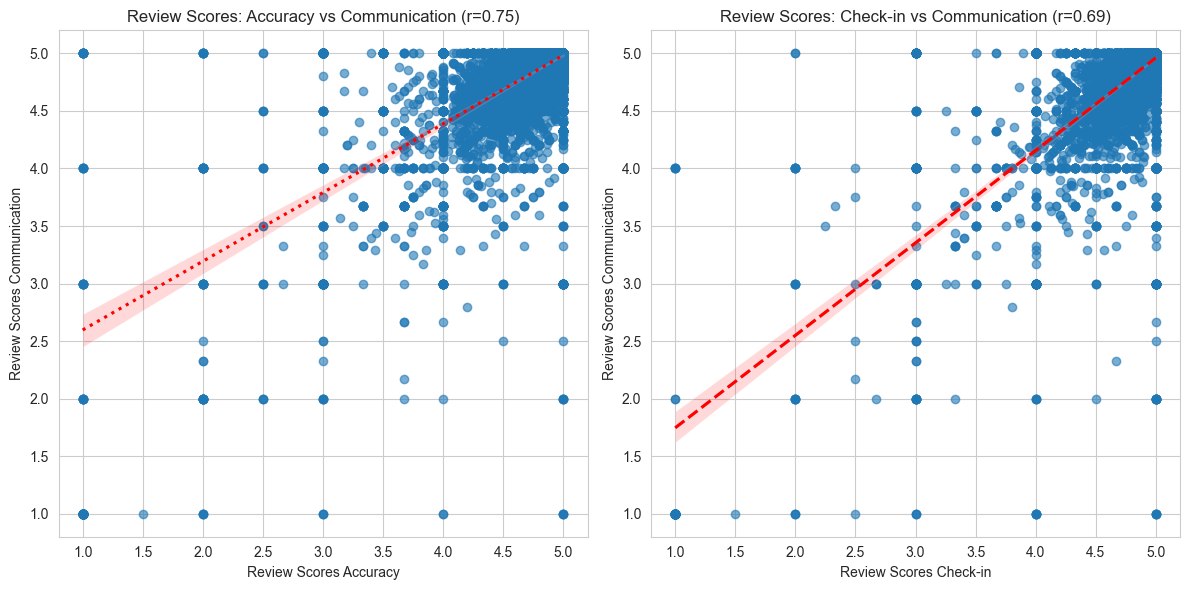

In [88]:
# based on https://www.statology.org/seaborn-regplot-equation/
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# review_scores_accuracy and review_scores_communication
sns.regplot(x='review_scores_accuracy', y='review_scores_communication', data=df_cleaned, 
            ax=axes[0], scatter_kws={'alpha':0.6}, line_kws={'color': 'red', 'linestyle': ':'})
axes[0].set_title('Review Scores: Accuracy vs Communication (r=0.75)')
axes[0].set_xlabel('Review Scores Accuracy')
axes[0].set_ylabel('Review Scores Communication')

# review_scores_checkin and review_scores_communication
sns.regplot(x='review_scores_checkin', y='review_scores_communication', data=df_cleaned, 
            ax=axes[1], scatter_kws={'alpha':0.6}, line_kws={'color': 'red', 'linestyle': '--'})
axes[1].set_title('Review Scores: Check-in vs Communication (r=0.69)')
axes[1].set_xlabel('Review Scores Check-in')
axes[1].set_ylabel('Review Scores Communication')

plt.tight_layout()
plt.show()

## Distance Matrix

sources:
* https://stackoverflow.com/questions/39203662/euclidean-distance-matrix-using-pandas
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform

In [89]:
# subset features for memory constraints
selected_features = ['bedrooms', 'accommodates', 'beds','days_since_last_review','review_scores_rating',
                     'review_scores_cleanliness','average_ratings'] # based on correlation with price

subset = 10  # subset records for memory constraints

In [90]:
df_subset = df_proximity[selected_features].iloc[:subset]

# Compute Euclidean distance matrix
distance_matrix_subset = squareform(pdist(df_subset, metric='euclidean'))

In [91]:
distance_df_subset = pd.DataFrame(distance_matrix_subset, index=df_subset.index, columns=df_subset.index)  # for further analysis/visualization

In [92]:
distance_df_subset.head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,5.411501,1.647504,1.386259,0.535901,3.202506,1.490782,1.058761,0.736872,7.436680
1,5.411501,0.000000,5.685238,5.504988,5.389932,6.302105,5.424175,5.559505,5.335540,9.155271
2,1.647504,5.685238,0.000000,1.746835,1.907625,2.604597,2.112877,2.022260,1.131943,6.754820
3,1.386259,5.504988,1.746835,0.000000,1.532729,2.088981,1.468995,2.053186,1.557620,6.187577
4,0.535901,5.389932,1.907625,1.532729,0.000000,3.494985,1.328473,0.900178,1.036735,7.686043
5,3.202506,6.302105,2.604597,2.088981,3.494985,0.000000,3.334545,3.820431,3.040332,4.268806
6,1.490782,5.424175,2.112877,1.468995,1.328473,3.334545,0.000000,2.105783,1.891490,7.304732
7,1.058761,5.559505,2.022260,2.053186,0.900178,3.820431,2.105783,0.000000,1.071528,8.007255
8,0.736872,5.335540,1.131943,1.557620,1.036735,3.040332,1.891490,1.071528,0.000000,7.295134
9,7.436680,9.155271,6.754820,6.187577,7.686043,4.268806,7.304732,8.007255,7.295134,0.000000


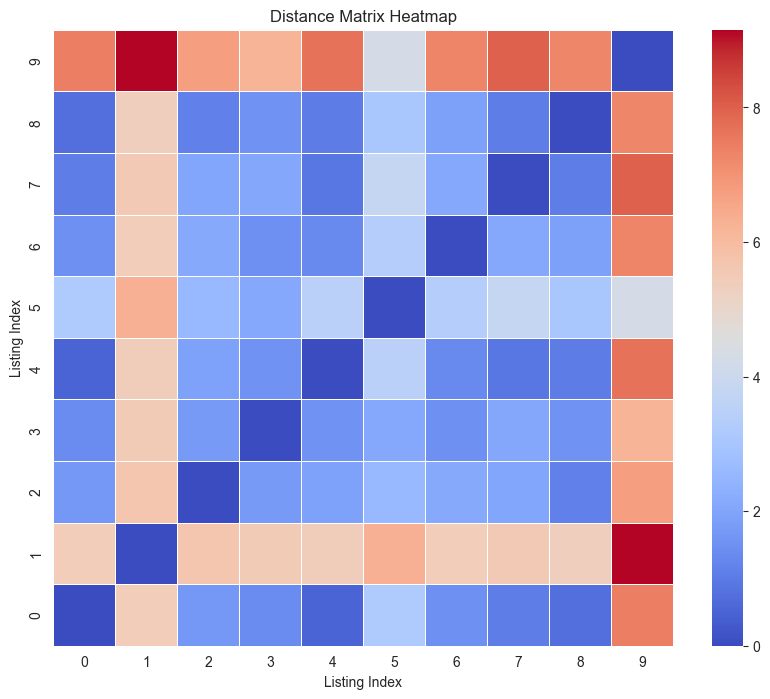

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(distance_df_subset, cmap='coolwarm', linewidths=0.5)
plt.title("Distance Matrix Heatmap")
plt.xlabel("Listing Index")
plt.ylabel("Listing Index")
plt.gca().invert_yaxis()
plt.show()

# 7. Data Mining: Association Rule Mining (20 pts)

The apriori algorithm will only be used to extract for the frequent item sets.

In [94]:
def tokenize_amenities(amenities):
    amenities_list = amenities.split(', ')
    cleaned_list = [a.strip().lower() for a in amenities_list if a.strip()]
    return sorted(cleaned_list)

In [95]:
# ensure amenities is properly tokenized
df_cleaned['cleaned_amenities'] = df_cleaned['cleaned_amenities'].apply(tokenize_amenities)
df_cleaned[['cleaned_amenities']].head()

,cleaned_amenities
0,"[air conditioning, bed linens, body soap, ceil..."
1,"[air conditioning, elevator, kitchen, tv, wifi]"
2,"[32, clothing storage wardrobe, cooking basics..."
3,"[air conditioning, bathtub, bed linens, buildi..."
4,"[bed linens, blender, books and reading materi..."


In [96]:
transactions = df_cleaned['cleaned_amenities'].tolist()
ratings = df_cleaned['average_ratings'].tolist()
min_support = 0.1 * len(df_cleaned)

In [97]:
amenity_counts = Counter()
for amenities in df_cleaned['cleaned_amenities']:
    for amenity in amenities:
        amenity_counts[amenity] += 1

print(amenity_counts.most_common(10))

[('wifi', 18534), ('kitchen', 18049), ('hangers', 15747), ('essentials', 15471), ('dishes and silverware', 15441), ('cooking basics', 14146), ('bed linens', 13649), ('hot water', 13273), ('iron', 13157), ('elevator', 13116)]


In [98]:
# 1 item set
item_counts = Counter()
for t in transactions:
    for item in t:
        item_counts[item] += 1

freq_1 = {item for item, count in item_counts.items() if count >= min_support}  # filter
print(sorted(freq_1))

['ac - split type ductless system', 'air conditioning', 'baking sheet', 'bbq grill', 'beach access', 'bed linens', 'blender', 'body soap', 'building staff', 'ceiling fan', 'cleaning products', 'clothing storage wardrobe', 'coffee', 'coffee maker', 'cooking basics', 'dedicated workspace', 'dining table', 'dishes and silverware', 'drying rack for clothing', 'elevator', 'essentials', 'ethernet connection', 'extra pillows and blankets', 'fire extinguisher', 'first aid kit', 'free parking on premises', 'free street parking', 'free washer u2013 in unit', 'freezer', 'hair dryer', 'hangers', 'host greets you', 'hot water', 'iron', 'kitchen', 'laundromat nearby', 'lock on bedroom door', 'long term stays allowed', 'luggage dropoff allowed', 'microwave', 'oven', 'pets allowed', 'portable fans', 'private entrance', 'private patio or balcony', 'public or shared beach access', 'refrigerator', 'room-darkening shades', 'security cameras on property', 'self check-in', 'shampoo', 'smoke alarm', 'smoking

In [99]:
# get 2 item sets
combo2_counts = defaultdict(list)
for t, rating in zip(transactions, ratings):
    filtered = sorted([i for i in t if i in freq_1])
    for combo in combinations(filtered, 2):
        combo2_counts[combo].append(rating)

freq_2 = {combo: ratings for combo, ratings in combo2_counts.items() if len(ratings) >= min_support}  # since len(ratings) show how many times that combo was rated
for i, (combo, ratings) in enumerate(freq_2.items()):
    if i == 10: break  # print top 10
    print(f'{combo}: {ratings[:5]}')

('air conditioning', 'bed linens'): [4.83, 4.76, 4.61, 4.83, 4.73]
('air conditioning', 'dining table'): [4.83, 4.83, 4.73, 4.85, 4.91]
('air conditioning', 'dishes and silverware'): [4.83, 4.76, 4.61, 4.81, 4.77]
('air conditioning', 'elevator'): [4.83, 4.71, 4.76, 4.61, 4.81]
('air conditioning', 'essentials'): [4.83, 4.76, 4.61, 4.81, 4.77]
('air conditioning', 'extra pillows and blankets'): [4.83, 4.61, 4.83, 4.73, 4.53]
('air conditioning', 'hair dryer'): [4.83, 4.76, 4.61, 4.81, 4.77]
('air conditioning', 'hangers'): [4.83, 4.76, 4.61, 4.81, 4.77]
('air conditioning', 'hot water'): [4.83, 4.76, 4.61, 4.81, 4.77]
('air conditioning', 'iron'): [4.83, 4.76, 4.61, 4.81, 4.77]


In [100]:
# get 3 item sets
combo3_counts = defaultdict(list)
for t, rating in zip(transactions, ratings):
    filtered = sorted([i for i in t if i in freq_1])
    for combo in combinations(filtered, 3):
        pairs = list(combinations(combo, 2))
        if all(p in freq_2 for p in pairs):
            combo3_counts[combo].append(rating)

freq_3 = {combo: ratings for combo, ratings in combo3_counts.items() if len(ratings) >= min_support}  # filter
for i, (combo, ratings) in enumerate(freq_3.items()):
    if i == 10: break  # print top 10
    print(f'{combo}: {ratings[:5]}')

('air conditioning', 'bed linens', 'dishes and silverware'): [4.83, 4.61, 4.83, 4.78, 4.75]
('air conditioning', 'bed linens', 'essentials'): [4.83, 4.61, 4.83, 4.78, 4.75]
('air conditioning', 'bed linens', 'hangers'): [4.83, 4.61, 4.83, 4.78, 4.75]
('air conditioning', 'bed linens', 'hot water'): [4.83, 4.61, 4.83, 4.78, 4.75]
('air conditioning', 'bed linens', 'iron'): [4.83, 4.61, 4.83, 4.78, 4.75]
('air conditioning', 'bed linens', 'kitchen'): [4.83, 4.61, 4.83, 4.78, 4.75]
('air conditioning', 'bed linens', 'refrigerator'): [4.83, 4.61, 4.83, 4.78, 4.82]
('air conditioning', 'bed linens', 'wifi'): [4.83, 4.61, 4.83, 4.78, 4.75]
('air conditioning', 'dishes and silverware', 'elevator'): [4.83, 4.61, 4.83, 4.86, 4.76]
('air conditioning', 'dishes and silverware', 'essentials'): [4.83, 4.61, 4.83, 4.86, 4.76]


In [101]:
# combine item sets and compute for average rating
combo_ratings = {}
for combo_dict in [freq_2, freq_3]:
    for combo, rating_list in combo_dict.items():
        combo_ratings[combo] = sum(rating_list) / len(rating_list)

for combo, avg_rating in list(combo_ratings.items())[:10]:
    print(f"{combo}: {avg_rating:.2f}")

('air conditioning', 'bed linens'): 4.80
('air conditioning', 'dining table'): 4.82
('air conditioning', 'dishes and silverware'): 4.81
('air conditioning', 'elevator'): 4.79
('air conditioning', 'essentials'): 4.79
('air conditioning', 'extra pillows and blankets'): 4.82
('air conditioning', 'hair dryer'): 4.81
('air conditioning', 'hangers'): 4.80
('air conditioning', 'hot water'): 4.80
('air conditioning', 'iron'): 4.80


In [102]:
combo_ratings_df = pd.DataFrame(combo_ratings.items(), columns=['Amenity Combination', 'Average Rating'])
combo_ratings_df = combo_ratings_df.sort_values(by='Average Rating', ascending=False)
combo_ratings_df

,Amenity Combination,Average Rating
633,"(hair dryer, wine glasses)",4.875628
678,"(coffee, room-darkening shades)",4.875186
676,"(clothing storage wardrobe, wine glasses)",4.874832
312,"(clothing storage wardrobe, hair dryer)",4.873406
429,"(room-darkening shades, wine glasses)",4.871740
...,...,...
707,"(air conditioning, pets allowed)",4.764842
708,"(pets allowed, tv)",4.761087
717,"(smoking allowed, tv)",4.760236
528,"(smoking allowed, washer)",4.757339


In [103]:
# get top 10 only for relevance
top_10_combinations = combo_ratings_df.head(10)

# count occurence of each amenity in the top 10 for visualization
amenity_counter = Counter()
for combo in top_10_combinations['Amenity Combination']:
    for amenity in combo:
        amenity_counter[amenity] += 1

# convert to dataframe and sort
top_amenities_df = pd.DataFrame(amenity_counter.items(), columns=['Amenity', 'Frequency'])
top_amenities_df = top_amenities_df.sort_values(by='Frequency', ascending=False)

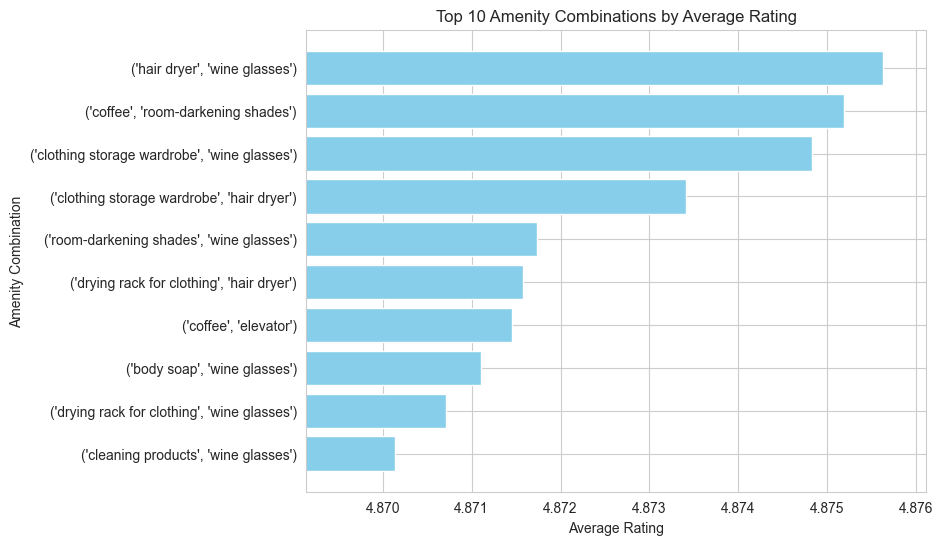

In [104]:
# top 10 amenity combinations by average rating
plt.figure(figsize=(8, 6))
plt.barh(top_10_combinations['Amenity Combination'].astype(str), top_10_combinations['Average Rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Amenity Combination')
plt.title('Top 10 Amenity Combinations by Average Rating')
plt.xlim(top_10_combinations['Average Rating'].min() - 0.001, top_10_combinations['Average Rating'].max() * 1.0001)  # to emphasize difference
plt.gca().invert_yaxis()
plt.show()

The horizontal bar chart showcases the top 10 amenity combinations ranked by their average ratings in Airbnb listings. Among these, the highest-rated combination includes **hair dryer**, and **wine glasses**. This suggests that listings offering these amenities tend to receive higher ratings compared to other combinations, and must be primary considerations for AirBnB hosts looking to provide premium experiences with comfort and convenience.

Other highly-rated amenity combinations include **coffee**, **room-darkening shades**, as well as **clothing storage**. While these plus the others seem to be only minor products or features that can be offered, their presence among the highly rated combinations speaks of how much guests value having these amenities provided to them for convenience and comfort.

Additionally, The presence of essential amenities such as **body soap** and **cleaning products** appears to be a common trend among the highest-rated listings, which show that small additional essentials make a difference for better experience.

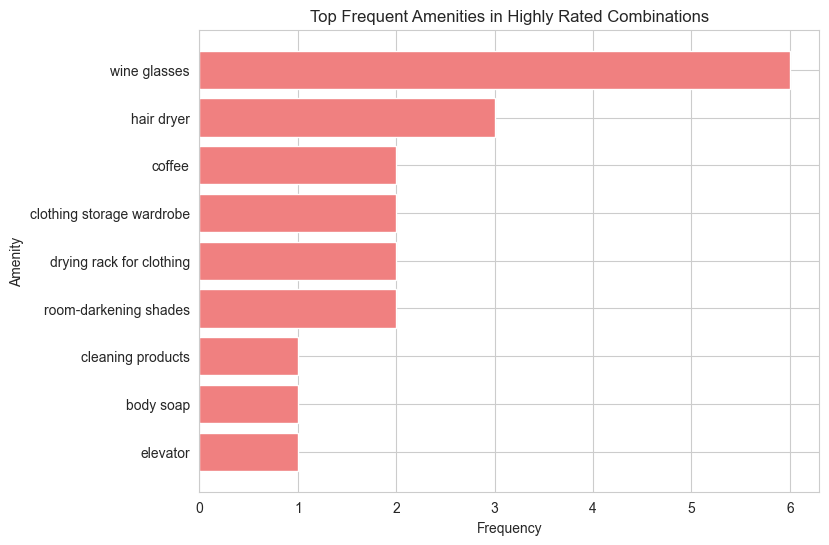

In [105]:
# top frequent amenities in combinations
plt.figure(figsize=(8, 6))
top_amenities_df = top_amenities_df.sort_values(by='Frequency', ascending=True)  # sort before plotting
plt.barh(top_amenities_df['Amenity'], top_amenities_df['Frequency'], color='lightcoral')
plt.xlabel('Frequency')
plt.ylabel('Amenity')
plt.title('Top Frequent Amenities in Highly Rated Combinations')
plt.show()

This horizontal bar chart illustrates the most frequent amenities found in the top-rated amenity combinations for Airbnb listings. Each amenity's frequency reflects its importance, as these features repeatedly appear in highly rated listings.

The most frequent amenity is **wine glasses**, followed by **hair dryer**. This suggests that guests like to experience some convenience and luxury during their airbnb stay. Other frequently appearing amenities, such as **drying rack for clothing**, **clothing storage wardrobe**, and **room darkening shades**, highlight the importance of convenience and privacy control.

These findings indicate that guests tend to value a combination of convenience, relaxation, and practicality when booking an Airbnb. Hosts looking to enhance their ratings may benefit from incorporating these amenities into their listings.